/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:68: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10000,center=False).sum()


5.47936030411
0.549891686847


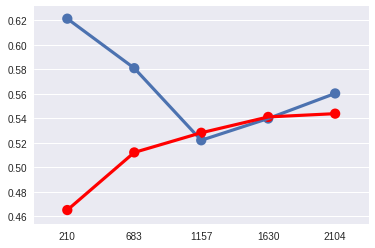

In [55]:
%matplotlib inline
import pandas as pd
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
test_ids = test['ID'].copy()
answer = train.y
train = train.drop('y', axis=1)
complete = pd.concat([train, test])

column_types = complete.dtypes
categorical_columns = column_types[column_types == 'object'].index.values
numeric = complete.select_dtypes(include=['int64'])
encoded_categorical = pd.get_dummies(complete[categorical_columns])
factorized_categorical = pd.DataFrame()

for column in categorical_columns:
    factorized_categorical[column + '_factor'] = pd.Series(pd.factorize(complete[column], sort=True)[0], complete[column].index.values)
    
complete = pd.concat([numeric, encoded_categorical, factorized_categorical], axis=1)

columns = ['X118', 'X119', 'X136', 'X232', 'X263', 'X279', 'X314', 'X315']
# columns = [
#     'X29', 'X54', 'X76', 'X118', 'X119', 
#     'X127', 'X136', 'X189', 'X232', 'X263', 
#     'X279', 'X314', 'X315'
# ]
# columns = ['X0_factor', 'X47', 'X8_g', 'X115', 'X151', 'X256', 'X5_n', 'X127', 'X2_b', 'X38']
# columns = [
#     'X29', 'X0_factor', 'X47', 'X147', 'X17', 
#     'X2_aj', 'X60', 'X127', 'X227', 'X372', 
#     'X0_o', 'X5_w'
# ]
columns = ['X0_factor', 'X314'] #, 'X5_factor', 'X8_factor']
complete = complete[columns]

train = complete.head(len(train))
test = complete.tail(len(test))

from sklearn.linear_model import ARDRegression, BayesianRidge, \
    ElasticNet, HuberRegressor, Lars, Lasso, LassoLars, LassoLarsIC, LinearRegression, \
    OrthogonalMatchingPursuit, PassiveAggressiveRegressor, RANSACRegressor, SGDRegressor, \
    TheilSenRegressor, Ridge

from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import CCA, PLSCanonical, PLSRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import numpy as np

model = LGBMRegressor(n_estimators=100, num_leaves=8)
predictions = cross_val_predict(model, train, answer, cv=5)

report = train.copy()
report['expected'] = answer
report['actual'] = predictions
report['diff'] = np.abs(report.expected - report.actual).round(0)
report['underestimated'] = report['actual'] < report['expected']
report['metrics_effect'] = ((answer - predictions) ** 2) / np.sum((answer - np.mean(answer)) ** 2)
report = report.sort_values('diff')
report['sum'] = pd.rolling_sum(report['metrics_effect'], window=10000, min_periods=1)
print mean_absolute_error(answer, predictions)
print r2_score(answer, predictions)

train_sizes, train_scores, test_scores = learning_curve(model, train, answer, cv=2)

data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), train_scores) }
sns.pointplot(x='x', y='y', data=data)

data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), test_scores) }
sns.pointplot(x='x', y='y', data=data, color='red')

In [36]:
pd.options.display.max_rows = 2000
report[['expected', 'actual', 'diff', 'underestimated', 'metrics_effect', 'sum']].tail(2000)

,expected,actual,diff,underestimated,metrics_effect,sum
588,111.41,115.902135,4.0,False,0.000030,0.022248
1239,114.56,110.754057,4.0,True,0.000021,0.022269
596,90.76,94.960171,4.0,False,0.000026,0.022295
1080,97.43,93.837431,4.0,True,0.000019,0.022315
1078,90.09,94.262859,4.0,False,0.000026,0.022340
600,90.86,94.835262,4.0,False,0.000023,0.022364
3555,90.85,94.946650,4.0,False,0.000025,0.022388
1669,97.86,94.262859,4.0,True,0.000019,0.022408
3279,97.96,101.840482,4.0,False,0.000022,0.022430
1566,89.90,94.262859,4.0,False,0.000028,0.022458


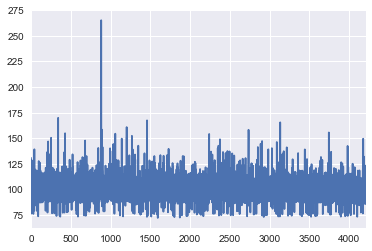

In [206]:
report['ID'] = report.index.values
report['expected'].sort_index().plot(use_index=True)

In [33]:
report[report['diff'] > 10].metrics_effect.sum()


# 8% of the data, generate 54% the error metrics

0.31467013349323253

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

# def plot_boxes(cols, dato):
#     return map(lambda x: sns.boxplot(x='answer', y=x, data=dato, ax=plt.figure().add_subplot(111)), cols)

# [
#     sns.pairplot(knn_report[knn_report['predicted'] == knn_report['expected']], hue='expected', markers='+', plot_kws={'s': 1 }),
#     sns.pairplot(rr_report[rr_report['predicted'] == rr_report['expected']], hue='expected', markers='+', plot_kws={'s': 1 })
# ]

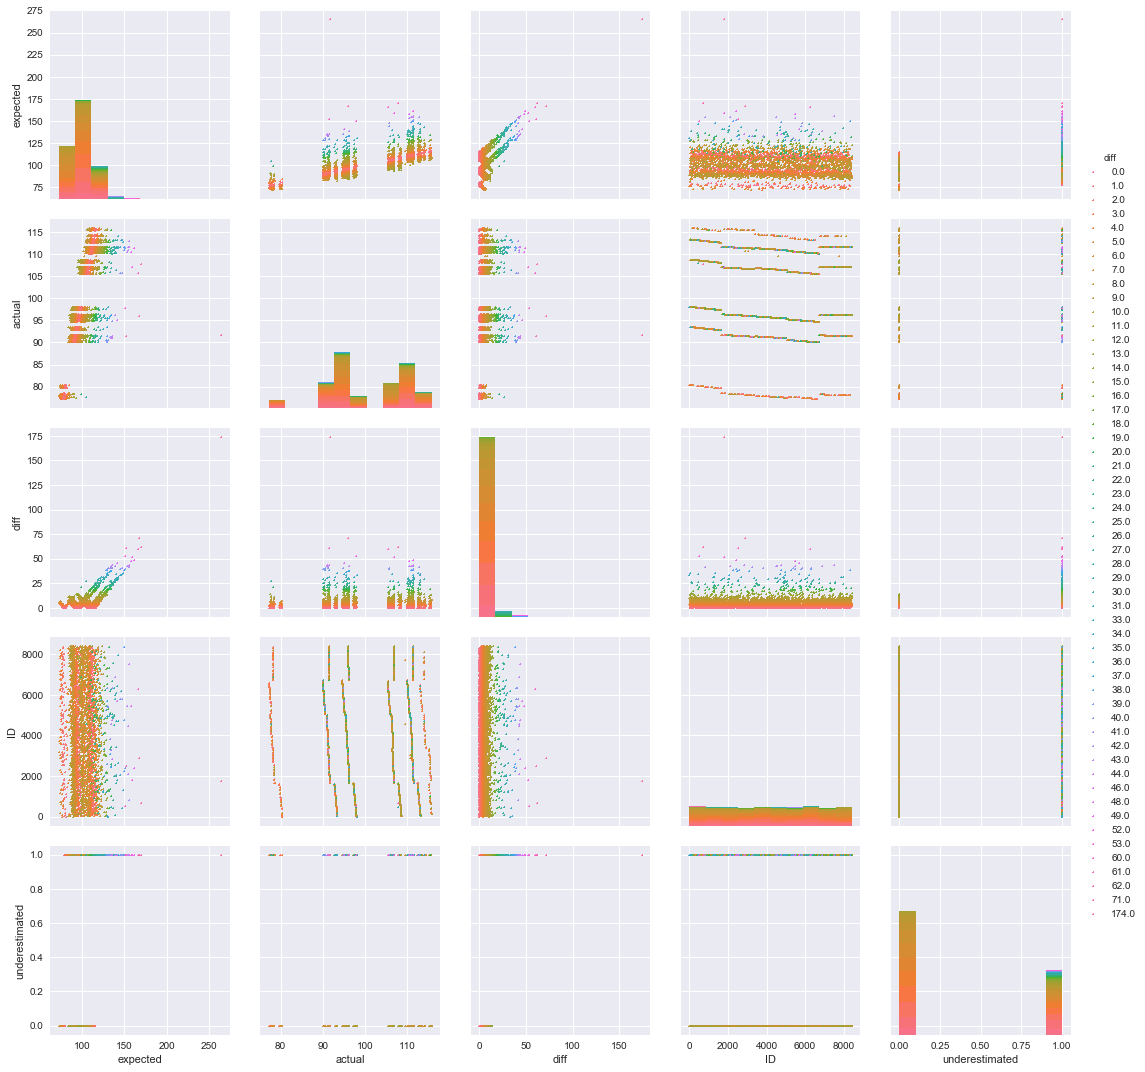

In [116]:
sns.pairplot(report[['expected', 'actual', 'diff', 'ID', 'underestimated']], markers='+', hue='diff', plot_kws={'s': 1}, size=3)

In [42]:
import time

model.fit(train, answer)
predictions = model.predict(test)

submission_response = pd.DataFrame({
    'ID': test_ids,
    'y': predictions
})

timestr = time.strftime("%Y%m%d_%H%M")
pd.DataFrame(submission_response).to_csv('./outputs/naive.' + timestr + '.csv', header=True, index=False, line_terminator="\n")
pd.DataFrame(submission_response).to_csv('./outputs/_naive.latest.csv', header=True, index=False, line_terminator="\n")